In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn
from IPython.display import display
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

### 決定木のアンサンブル法

アンサンブル法とは、複数の機械学習モデルを組み合わせることでより強力なモデルを構築する手法である。  

#### ランダムフォレスト

最初に構築する決定木の数を決め、決定木を作る際にはブートストラップサンプリングと呼ばれるものを行う。これを行うことによって、元のデータセットと同じだが、データの一部（約3分の1）が欠け、一部が何度か現れているデータセットが得られる。  
ブートストラップサンプリングによって、ランダムフォレストの中の個々の決定木が、少しずつ違うデータセットに対して構築されることになる。  
ランダムフォレストを用いて予測を行う場合、まずはすべての決定木に対して予測を行い、回帰の場合はこれらの結果の平均値を最終的な予測とし、クラス分類の場合は「ソフト投票」戦略を用いて、個々の出力ラベルに対して確率を出力した後、すべての確率予測を平均し、最も確率が他界ラベルが予測値となる。

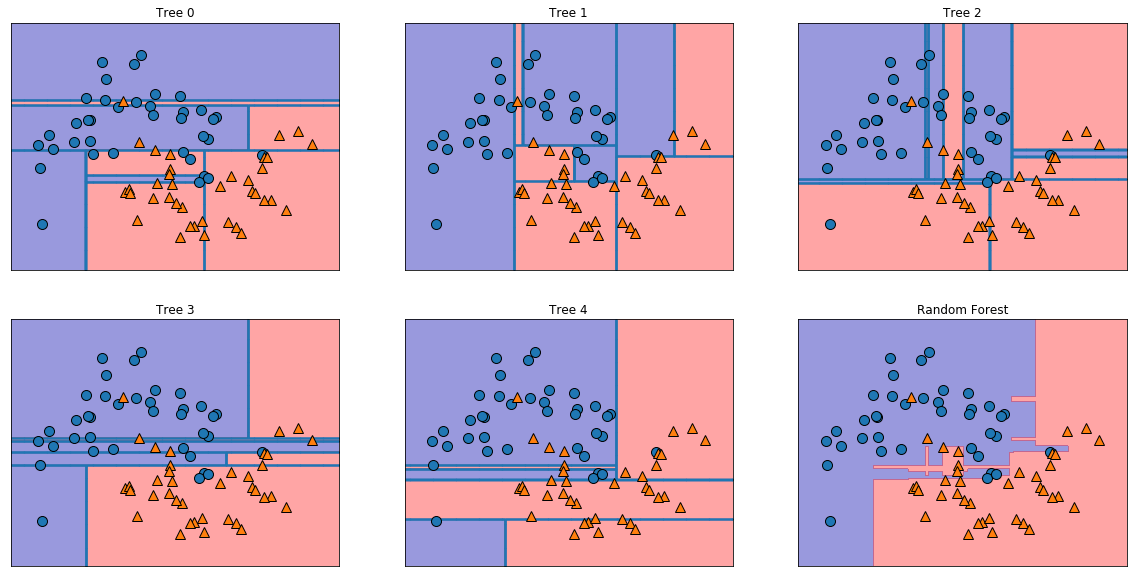

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)#n_estimatorsは決定木の数を表す
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)

axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

5つの決定木が学習した決定境界は明らかに相互に異なることがわかる。  
ランダムフォレストは個々のどの決定木よりも過剰適合が少なく、直観に合致した決定境界を描いている。  
実際のアプリケーションに対してはもっと多くの決定木を使うため、決定境界はより滑らかになる。

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)#決定木の数を100
forest.fit(X_train, y_train)#random forestで学習

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Text(0, 0.5, 'Feature')

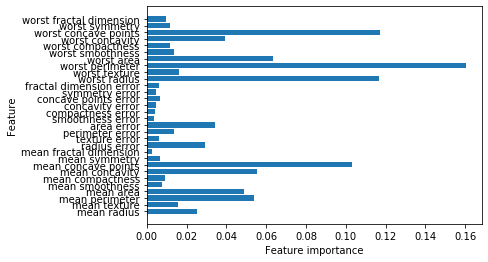

In [4]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

RandomForestの場合では、決定木の時よりもはるかに多くの特徴量に対して0以上の重要度を与えている。  
多くの場合パラメータチューニングをせずに使え、データのスケール変換をする必要もない。

### 勾配ブースティング回帰木（勾配ブースティングマシン）

ランダムフォレストと対照的に、勾配ブースティングでは、1つ前の決定木の誤りを次の決定木が修正するようにして、決定木を順番に作っていく。  
デフォルトでは乱数性はないが、その代わりに強力な事前枝刈りを用いる。（深さ1から5程度の非常に浅い決定木が用いられる）  
これまでの決定木の過ちをどのくらい補正しようとするかのパラメータを学習率(learning rate)といい、大きくするほど強く補正を行おうとして、モデルは複雑になる。

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)
"""
print(X_train)
print(X_train.shape)
print(X_test)
print(X_test.shape)

print(y_train)
print(y_train.shape)
print(y_test)
print(y_test.shape)
"""
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
#print(gbrt.predict(X_test))
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


訓練データの精度が100％であるため、過剰適合が疑われる  
   ===>>> より強力な事前枝刈りを行うか、学習率を下げればよい

In [6]:
gbrt =GradientBoostingClassifier(random_state=0, max_depth=1)#決定木の深さを１にして、より強力な事前枝刈りを行う
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [7]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)#学習率を下げる
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


Text(0, 0.5, 'Features')

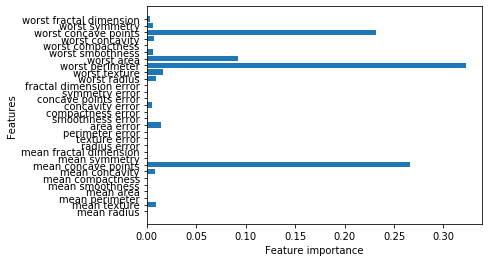

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

n_features = cancer.data.shape[1]
plt.barh(range(n_features), gbrt.feature_importances_, align="center")
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Features")

## カーネル法を用いたサポートベクタマシン

カーネル法を用いたサポートベクタマシンの背後にある数学はかなり難しい。そのため、背後にある考え方だけをみていく。  

Text(0, 0.5, 'Feature 1')

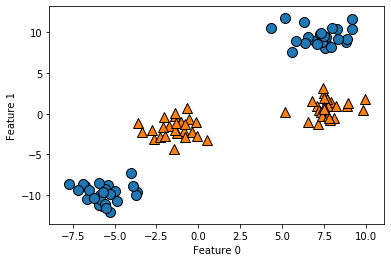

In [9]:
X, y = make_blobs(centers=4, random_state=8)
y= y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

上のデータセットは線形分離が不可能な2クラス分類のデータセットである。  
線形モデルによるクラス分類では、直線で分離することしかできないため、このようなデータセットではうまくいかない。  
試しにやってみる

C:\Users\SHOHEI NOGUCHI\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

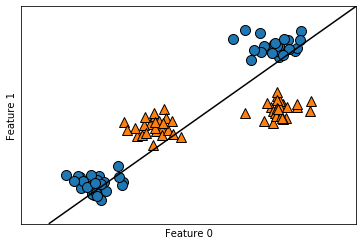

In [10]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


ここで入力特徴量を拡張してみる。
feature1 ** 2で2番目の特徴量の2乗を新しい特徴量として加えてみる

Text(0.5, 0, 'Feature 1 ** 2')

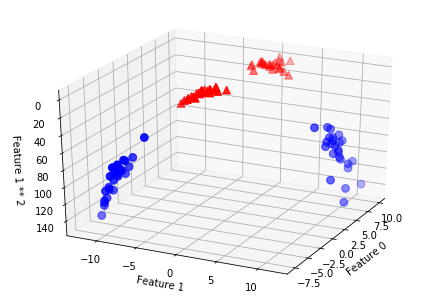

In [11]:
X_new = np.hstack([X, X[:, 1:] ** 2])#2番目の特徴量の2乗を追加

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)#3Dで可視化

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="^", cmap=mglearn.cm2, s=60)

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

新しい表現によって2つのクラスを線形モデルで、つまり3次元空間内の平面を用いて分離することが可能になっている。

C:\Users\SHOHEI NOGUCHI\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'Feature 1 ** 2')

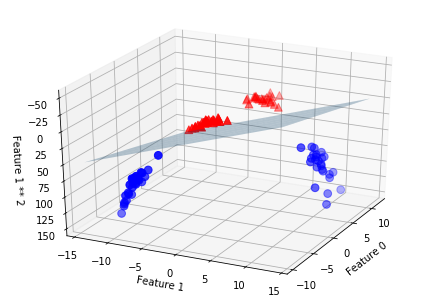

In [12]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)#座標ベクトルから座標行列を返す
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="^", cmap=mglearn.cm2, s=60)

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

これを元の特徴量の関数としてみると、つまりfeature0とfeature1の2次元で表すと、線形モデルは線形ではなくなっていることがわかる。  
（曲線になっている）

Text(0, 0.5, 'Feature 1')

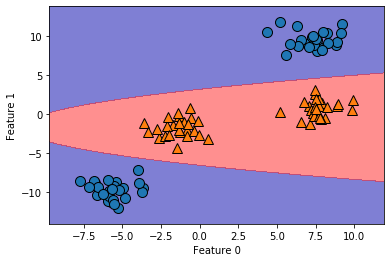

In [13]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### カーネルトリック

非線形の特徴量をデータ表現に加えることで、線形モデルがはるかに強力になる。  
しかし、実際にはどの特徴量を加えたらよいかわからない。たくさんの特徴量を加えると計算量が大きくなりすぎる。  
そのため、高次元空間でのクラス分類器を学習させる数学トリック（これがカーネルトリック）を使って、データポイントの拡張を行わずに直接計算する方法がある。

### SVMを理解する

訓練の過程でSVMは個々のデータポイントが2つのクラスの決定境界を表現するのにどの程度重要かを学習する。  
多くの場合、2つのクラスの境界に位置するごく一部の訓練データポイントだけが決定境界を決定する。  
これらのデータポイントをサポートベクタ（サポートベクトル : supprt vector）と呼ぶ。  
   
新しいデータポイントに対して予測を行う際、サポートベクタとデータポイントとの距離（ガウシアンカーネル）を測定し、クラス分類の時に、距離と個々のサポートベクタの重要性によって決定される。

Text(0, 0.5, 'Feature 1')

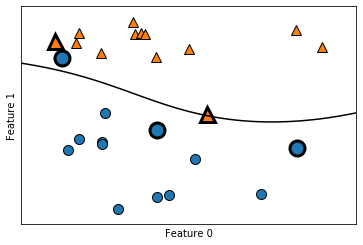

In [14]:
from sklearn.svm import SVC
X, y =mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)#境界線を学習
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)#重要なサポートベクタを太字にする
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

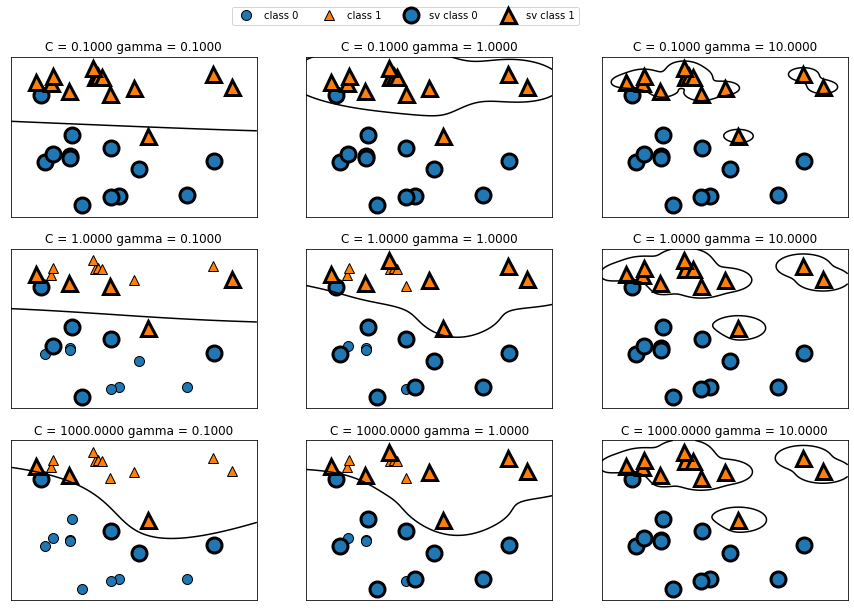

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C, in zip(axes,[-1, 0, 3]):#Cは正規化パラメータ
    for a, gamma in zip(ax, range(-1, 2)):#ガンマ(gamma)はガウシアンカーネルの幅を調整するパラメータ
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9,1.2))

gammaが小さいとガウシアンカーネルの直径が大きくなり、多くの点を近いと判断する。そのため、左の方では決定境界がなめらかになり、右のほうでは、個々のデータポイントをより重視するようになる。  
gammaが大きくなるとモデルはより複雑になる。
  
  
上から下に、すなわちトレードオフパラメータCを変化させると、小さいときには制限されたモデルに対応し、個々のデータポイントをより重視するようになり、大きいときには、データポイントがより強い影響を持つことになり、正しくクラス分類が行われるように決定境界を曲げる。

In [16]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set:{:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set:{:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set:0.90
Accuracy on test set:0.94


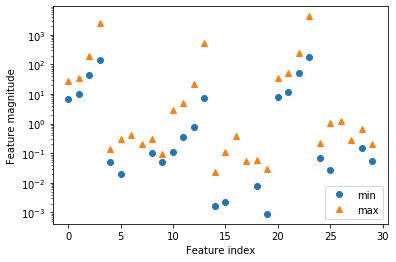

In [17]:
plt.plot(X_train.min(axis=0), "o", label="min")
plt.plot(X_train.max(axis=0), "^", label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [18]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
#個々の特徴量の最小値を０、最大値を１にしてスケール変換する
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [19]:
#テストセットに対しても同様にスケール変換
X_test_scaled = (X_test - min_on_training) / range_on_training

In [20]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set:0.984
Accuracy on test set:0.972


In [21]:
svc = SVC(C=24)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.986


In [22]:
for i in range(1, 50):
    svc = SVC(C=i)
    svc.fit(X_train_scaled, y_train)
    print("C:{}".format(i))
    print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled, y_train)))
    print("   Accuracy on test set:{:.3f}".format(svc.score(X_test_scaled, y_test)))

C:1
Accuracy on training set:0.984
   Accuracy on test set:0.972
C:2
Accuracy on training set:0.986
   Accuracy on test set:0.965
C:3
Accuracy on training set:0.986
   Accuracy on test set:0.958
C:4
Accuracy on training set:0.986
   Accuracy on test set:0.972
C:5
Accuracy on training set:0.986
   Accuracy on test set:0.972
C:6
Accuracy on training set:0.988
   Accuracy on test set:0.972
C:7
Accuracy on training set:0.988
   Accuracy on test set:0.972
C:8
Accuracy on training set:0.988
   Accuracy on test set:0.972
C:9
Accuracy on training set:0.988
   Accuracy on test set:0.972
C:10
Accuracy on training set:0.988
   Accuracy on test set:0.972
C:11
Accuracy on training set:0.988
   Accuracy on test set:0.972
C:12
Accuracy on training set:0.988
   Accuracy on test set:0.972
C:13
Accuracy on training set:0.988
   Accuracy on test set:0.972
C:14
Accuracy on training set:0.988
   Accuracy on test set:0.972
C:15
Accuracy on training set:0.988
   Accuracy on test set:0.972
C:16
Accuracy on tr

訓練セットとテストセットの精度が良く似ているため、Cやgammaを増やしてさらに複雑なモデルにすることで、モデルの精度を上げていく。

カーネル法を用いたサポートベクタマシンは様々なデータセットに対してうまく機能する協力まモデルである。  
SVMを用いるとわずかな特徴量しかない場合にも複雑な決定境界を生成することができる。しかし、データのサンプルが非常に多くなると、実行時やメモリの使用量の面で難しくなってくる。また、注意深くデータの前処理とパラメータの調整を行う必要がある。  
また、正則化のパラメータCや、カーネルの選択、カーネル固有もパラメータなど重要なパラメータが存在する。Cとgammaはどちらもモデルの複雑さを制御するパラメータであり、2つのパラメータの設定は強く相関するため、同時に調整する必要がある。

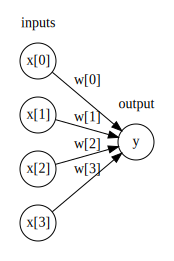

In [23]:
display(mglearn.plots.plot_logistic_regression_graph())

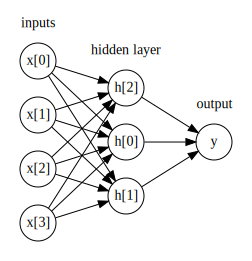

In [24]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

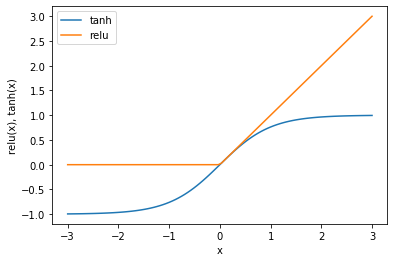

In [25]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

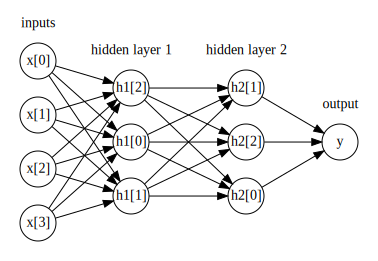

In [26]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'Feature 1')

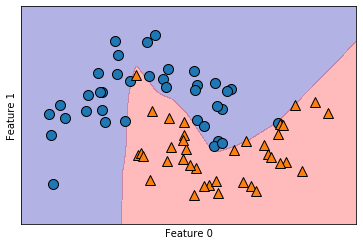

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#デフォルトでは隠れ層に100ユニット持つニューラルネットワークである
mlp = MLPClassifier(solver = "lbfgs", random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

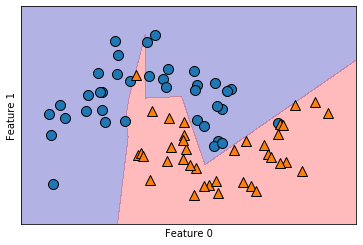

In [28]:
#隠れ層のニューロン（100個から10個に）を減らし、複雑さを減らしてみる
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

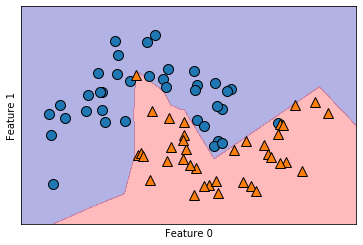

In [29]:
#次に隠れ層を2枚に増やしてみる（どちらの層もニューロン数は2層）
mlp =MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

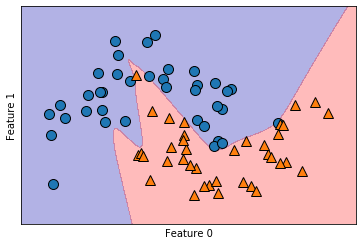

In [30]:
#デフォルトでは活性化関数がReLUであるが、これをtanhを用いてみる。（隠れ層は二枚のまま）
mlp =MLPClassifier(solver="lbfgs", activation="tanh", random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\SHOHEI NOGUCHI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\SHOHEI NOGUCHI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


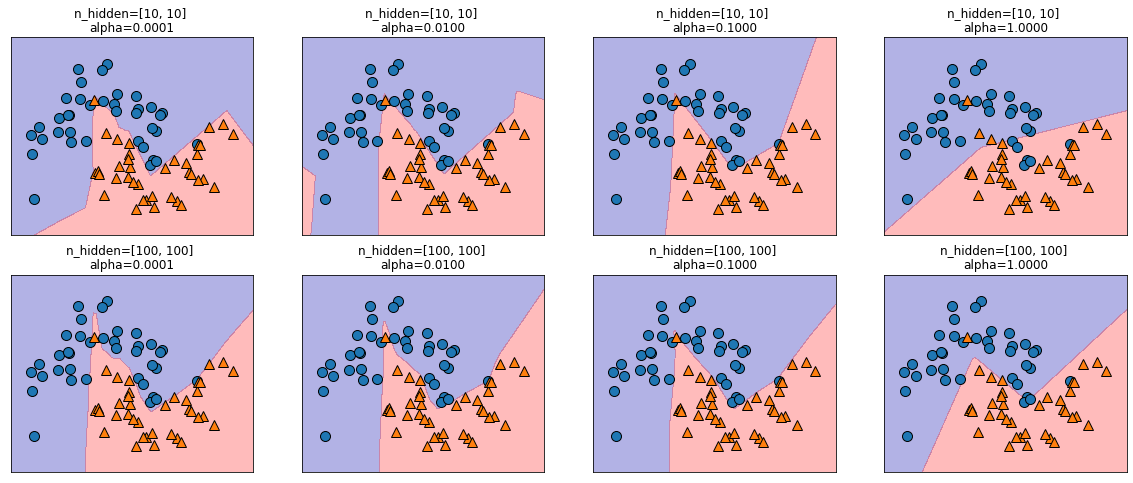

In [31]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):#alphaは正則化のパラメータ。大きいほど正則化が強い
        mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}] \nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

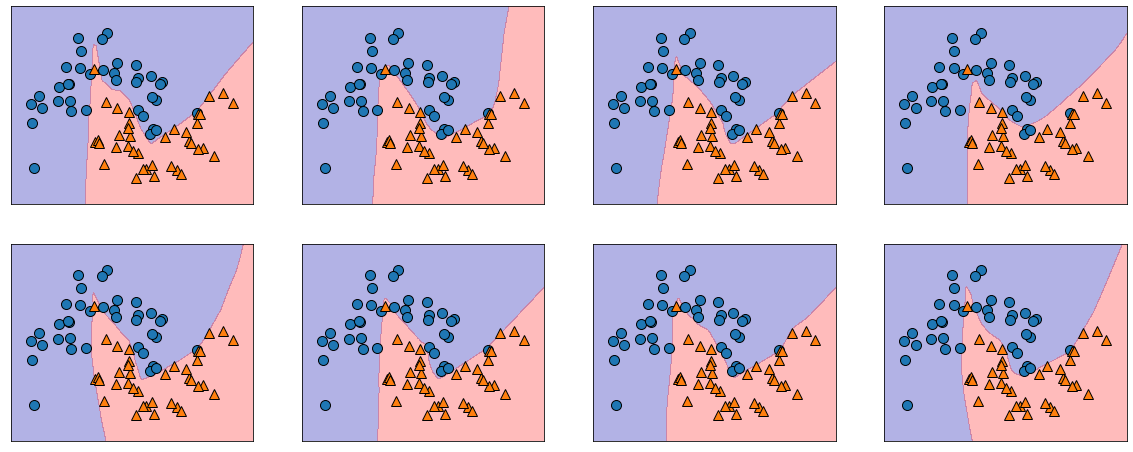

In [32]:
#同じパラメータだが異なる乱数で初期化された状態から学習された様々な決定境界
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver="lbfgs", random_state=i, hidden_layer_sizes=[100, 100],)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [33]:
print('Cancer data per-feature maxima:\n{}'.format(cancer.data.max(axis=0)))#cancerデータセットの各特徴量の最大値

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [35]:
#データのスケール変換

#訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis=0)

#訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

#平均を引き標準偏差の逆数でスケール変換（標準化）
X_train_scaled = (X_train - mean_on_train) / std_on_train

#テストセットにも
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set:0.991
Accuracy on test set:0.965


C:\Users\SHOHEI NOGUCHI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [36]:
#学習繰り返しの回数を増やす
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.972


In [37]:
#alphaを上げて重みに対する正則化を強化する
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.972


この結果はこれまでのモデルの中でもベストの性能

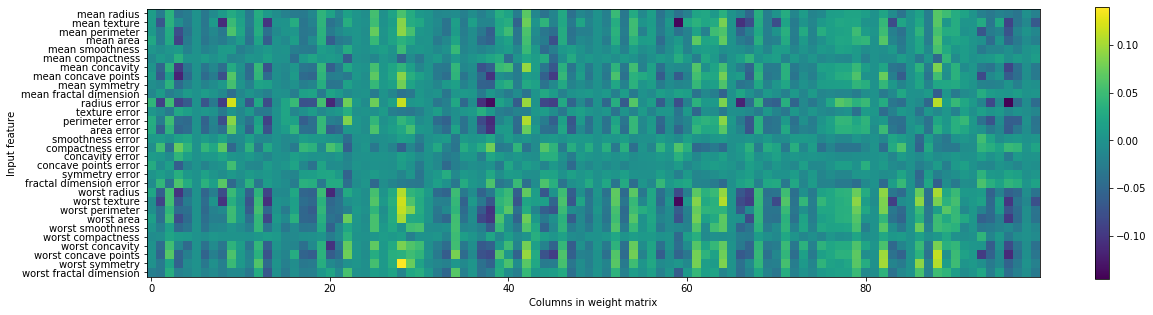

In [38]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation="none", cmap="viridis")
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

上は入力と第一隠れ層をつないでいる重みが学習されたものである。  
すべての隠れ層のニューロンに対して重みがとても小さい特徴量は、このモデルにとって重要ではないといえる。

ニューラルネットワークのパラメータを調整する一般的なやり方は、まずは過剰適合できるように大きいネットワークを作って、タスクがそのネットワークで訓練データを学習できることを意識したあと、ネットワークを徐々に小さくさせたり、alphaの値を増やして正則化を強化し、より汎化性能を向上させる

## クラス分類器の不確実性推定

あるテストポイントに対して、クラス分類器が出力する予測クラスだけではなく、その予測がどのくらい確かなのかを知りたい。

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)


y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)#勾配ブースティングモデルを適用
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
print("X_test.shape:{}".format(X_test.shape))
print("Decision function shape:{}".format(gbrt.decision_function(X_test).shape))

X_test.shape:(25, 2)
Decision function shape:(25,)


In [41]:
#decision_function(クラス分類器の不確実性推定に利用できる関数)(決定関数)の最初のいくつかを表示
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))
print("Decision function:\n{}".format(gbrt.decision_function(X_test)))
#決定関数の符号だけ見れば予測クラスがわかる。

Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]
Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106
 -7.69097177  4.11001634  1.10753883  3.40782247 -6.46262729  4.28986668
  3.90156371 -1.20031192  3.66166106 -4.17231209 -1.23010022 -3.91576275
  4.03602808  4.11001634  4.11001634  0.65708962  2.69826291 -2.65673325
 -1.86776597]


In [42]:
print("Thresholded decision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [43]:
#True/Falseを0/1に
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

pred = gbrt.classes_[greater_zero]
 
print("pred is equal to predictions:{}".format(np.all(pred == gbrt.predict(X_test))))

#predとpredictionsが一致

pred is equal to predictions:True


In [44]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimun:{:.2f} maximun{:.2f}".format(np.min(decision_function), np.max(decision_function)))
#決定関数の最小値、最大値

Decision function minimun:-7.69 maximun4.29


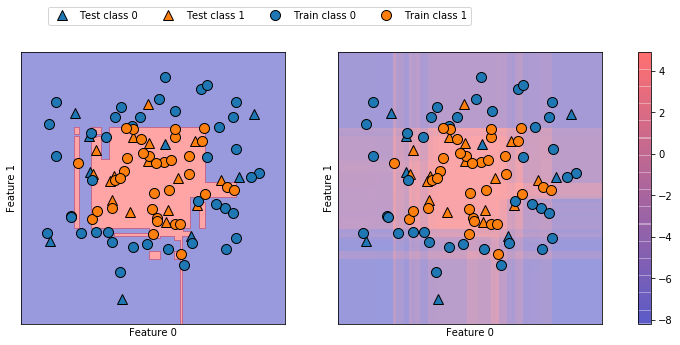

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0],X_test[:, 1], y_test, markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0],X_train[:, 1], y_train, markers="o", ax=ax)
    
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

cbar = plt.colorbar(score_image, ax=axes.tolist())
axes[0].legend(["Test class 0","Test class 1", "Train class 0","Train class 1"], ncol=4, loc=(.1, 1.1))

predict_probaはそれぞれのクラスに属する確率を表す。

In [46]:
print("Shape of probabilities:{}".format(gbrt.predict_proba(X_test).shape))
#確率配列の形

Shape of probabilities:(25, 2)


In [47]:
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


2つの確率なのでどちらかが50％以上になっている。そのクラスが予測クラスになる。

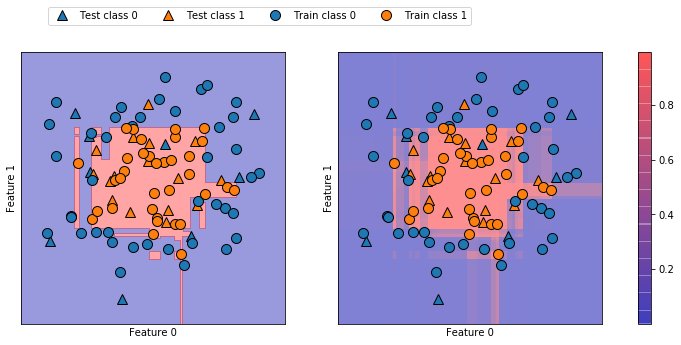

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
score_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function="predict_proba")

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0],X_test[:, 1], y_test, markers="^", ax=ax)
    mglearn.discrete_scatter(X_train[:, 0],X_train[:, 1], y_train, markers="o", ax=ax)
    
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

cbar = plt.colorbar(score_image, ax=axes.tolist())
axes[0].legend(["Test class 0","Test class 1", "Train class 0","Train class 1"], ncol=4, loc=(.1, 1.1))

## 多クラス分類の不確実性

decision_functionメソッドとpredict_probaメソッドは多クラス分類に対しても利用できる。

In [49]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [50]:
print("Decision function shape:{}".format(gbrt.decision_function(X_test).shape))
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape:(38, 3)
Decision function:
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [51]:
print("Argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
#np.argmaxは軸に沿った最大値のインデックスを返す
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [52]:
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("Sums:{}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
Sums:[1. 1. 1. 1. 1. 1.]


In [53]:
print("Agmax of predicted probabilities:\n{}".format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Agmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#irisデータセットのクラス名を表示する
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data:{}".format(logreg.classes_))#訓練データ中のクラス
print("predictions: \n{}".format(logreg.predict(X_test)[:10]))#予測値
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))#決定関数のargmax
print("argmax combined with classes_:\n{}".format(logreg.classes_[argmax_dec_func][:10]))#決定関数のargmaxをクラス名にしたもの

unique classes in training data:['setosa' 'versicolor' 'virginica']
predictions: 
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_:
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
